In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
from jsm_routines import SHMF, CSMF, SHMR
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


In [2]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

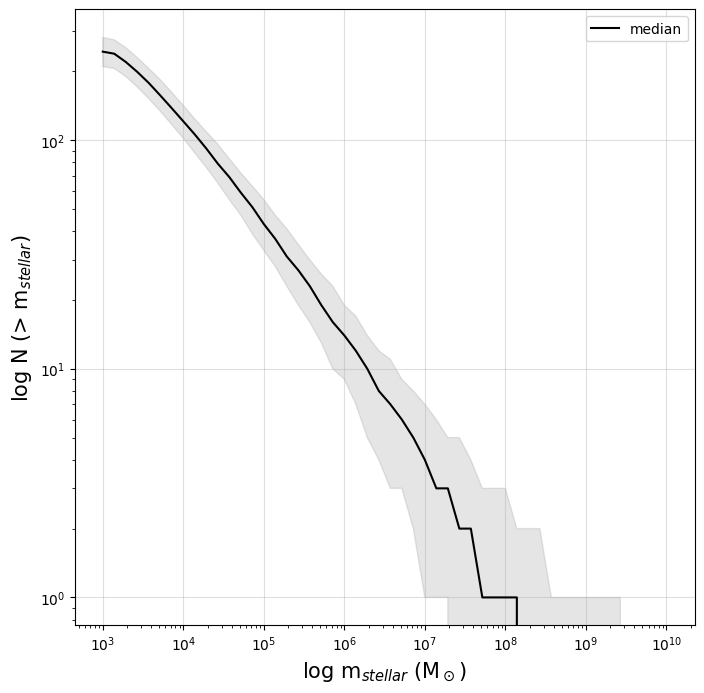

In [3]:
Ms = SHMR(as_data)

surv_massr, surv_CSMF = CSMF(Ms) # accreation mass of the surviving halos!

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:144: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\
/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:198: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


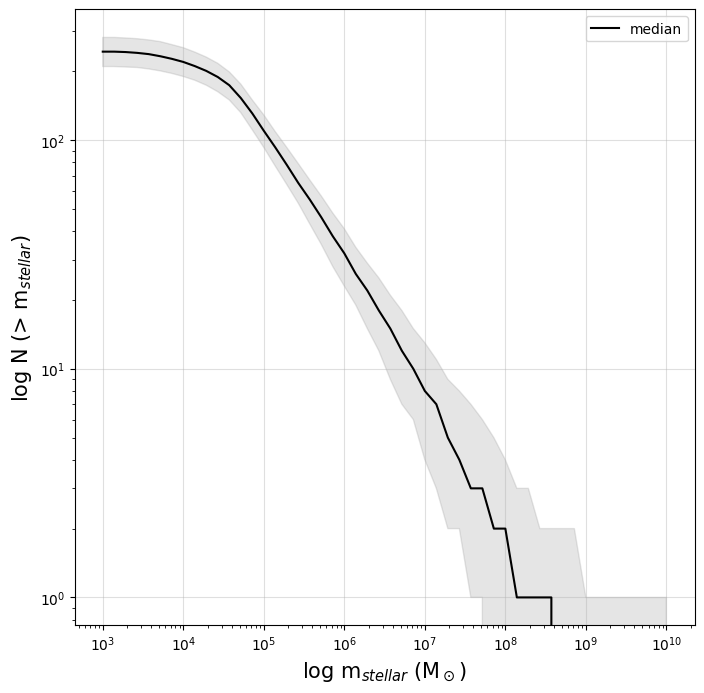

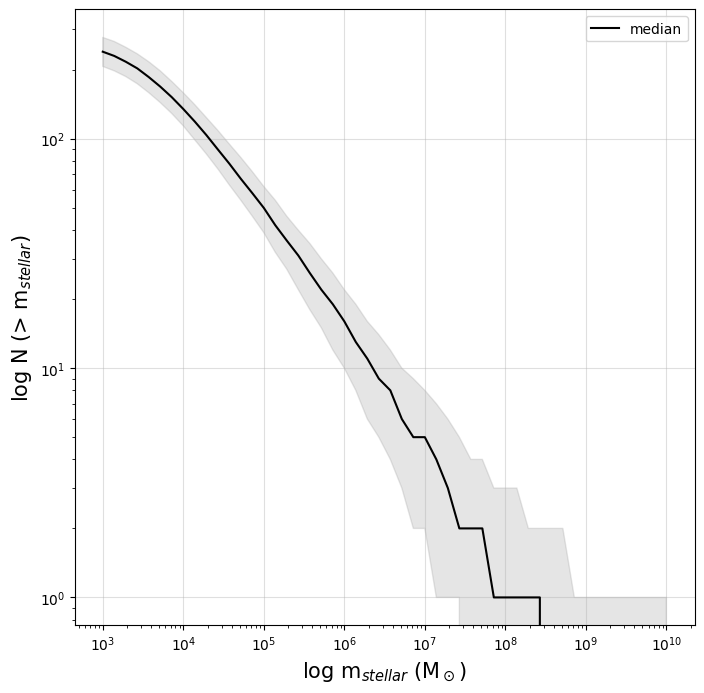

In [4]:
B13_Ms, RP17_Ms = SHMR(as_data, extra=True, red=as_red)

surv_massr_B, surv_CSMF_B = CSMF(B13_Ms)

surv_massr_R, surv_CSMF_R = CSMF(RP17_Ms)


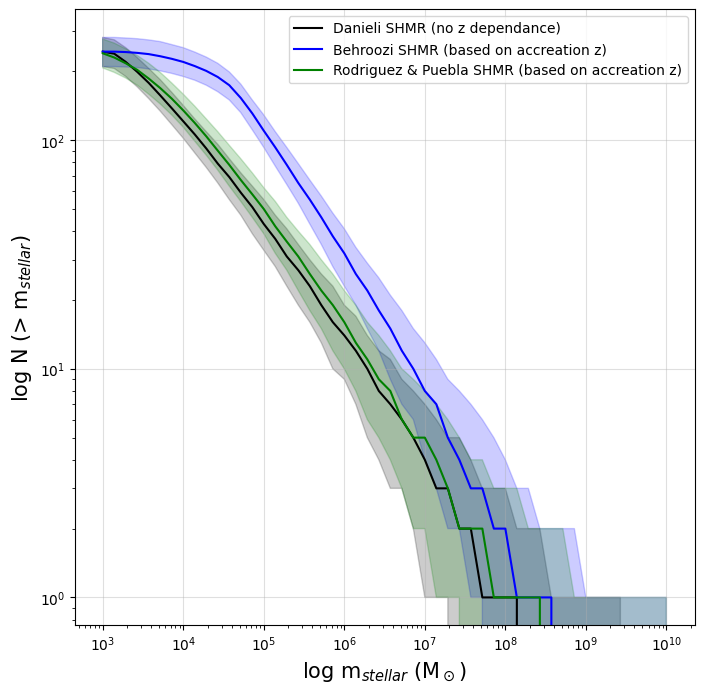

In [5]:
plt.figure(figsize=(8, 8))

plt.plot(surv_massr, surv_CSMF[1, :], label="Danieli SHMR (no z dependance)", color="black")
plt.fill_between(surv_massr, y1=surv_CSMF[0, :], y2=surv_CSMF[2, :], alpha=0.2, color="black")

plt.plot(surv_massr_B, surv_CSMF_B[1, :], label="Behroozi SHMR (based on accreation z)", color="blue")
plt.fill_between(surv_massr_B, y1=surv_CSMF_B[0, :], y2=surv_CSMF_B[2, :], alpha=0.2, color="blue")

plt.plot(surv_massr_R, surv_CSMF_R[1, :], label="Rodriguez & Puebla SHMR (based on accreation z)", color="green")
plt.fill_between(surv_massr_R, y1=surv_CSMF_R[0, :], y2=surv_CSMF_R[2, :], alpha=0.2, color="green")


plt.grid(alpha=0.4)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

In [6]:
#now implementing a redshift evolution parameter on the slope and intercept

In [7]:
as_data[:, 0] = 0.0  # removing the host mass from the matrix
zero_mask = as_data != 0.0 
Mh = np.log10(np.where(zero_mask, as_data, np.nan)) #switching the to nans!

In [8]:
as_data.shape[0]/5

625.8

In [9]:
halo_masses = Mh[0]
reds = as_red[0]

gammas = np.linspace(-0.25,0.25,5)

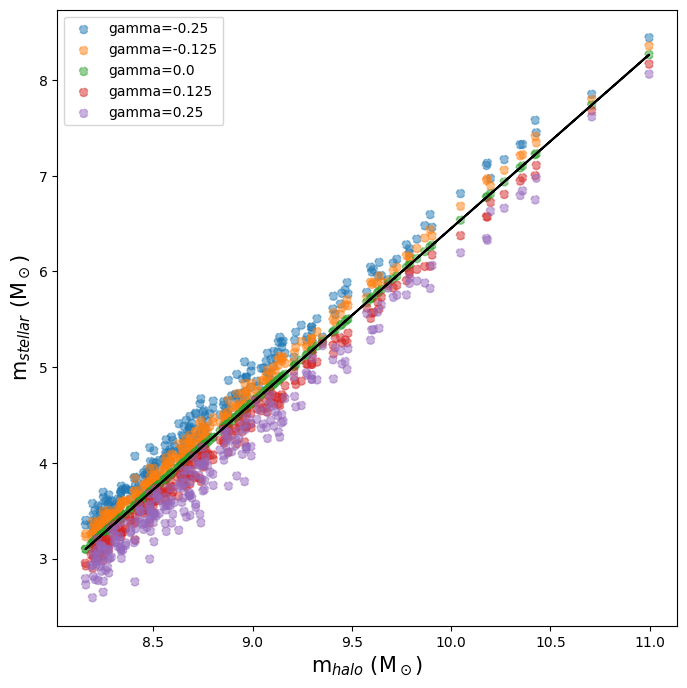

In [10]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, galhalo.lgMs_D22_det(halo_masses), color="black")

for i in gammas:
    plt.scatter(halo_masses, galhalo.lgMs_D22_zevo_i(halo_masses, reds, i), ls="--", label="gamma="+str(i), alpha=0.5)

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

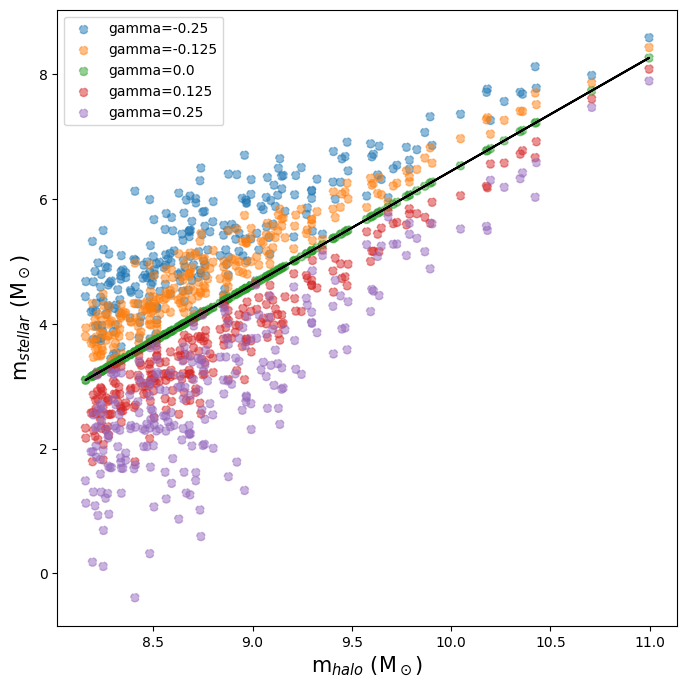

In [11]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, galhalo.lgMs_D22_det(halo_masses), color="black")

for i in gammas:
    plt.scatter(halo_masses, galhalo.lgMs_D22_zevo_s(halo_masses, reds, i), ls="--", label="gamma="+str(i), alpha=0.5)

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

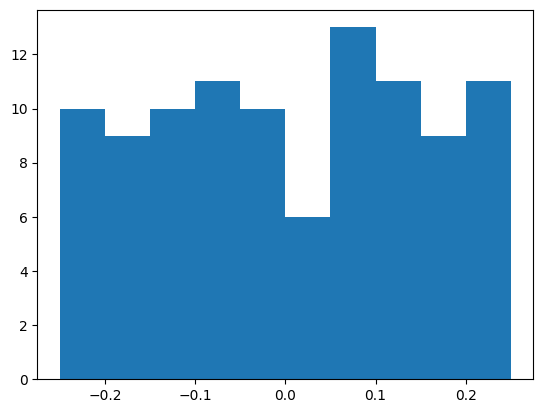

In [12]:
plt.hist(np.random.choice(np.linspace(-0.25,0.25), size=100))
plt.show()

#maybe I should be sampling randomly? instead of pushing the same SHMR through all 3000 iterations

In [13]:
gammas = np.linspace(-0.25,0.25,100) 

mat = np.zeros(shape=(100, 3, 50))

for i,val in enumerate(gammas):
    
    surv_massr_i, surv_CSMF_i = CSMF(SHMR(as_data, alt="s", gamma=val, red=as_red), plot=False) 

    mat[i] = surv_CSMF_i 

In [14]:
norm = mpl.colors.Normalize(vmin=gammas.min(), vmax=gammas.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, 100))

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_25184/2676443463.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, label="$\gamma_{slope}$")


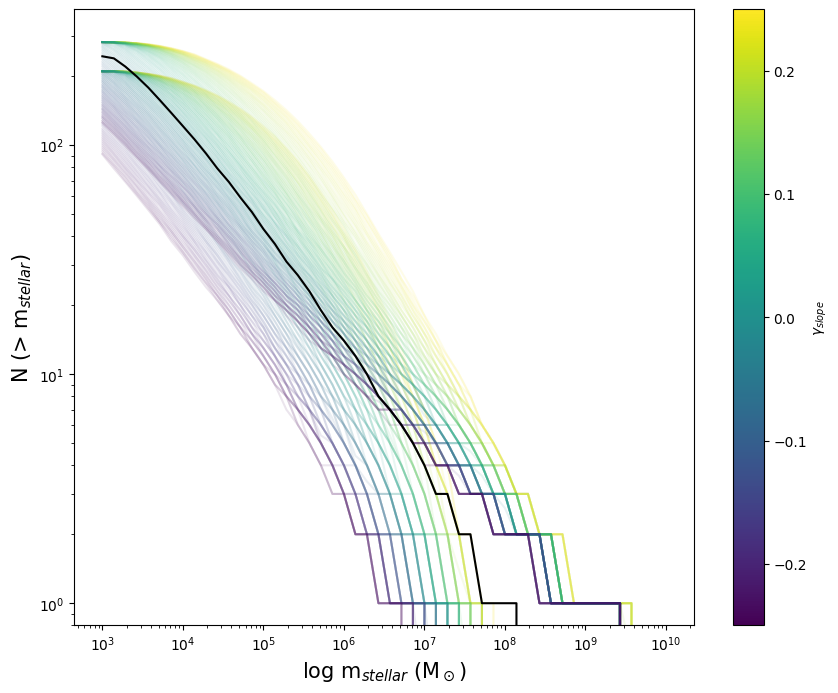

In [16]:
plt.figure(figsize=(10,8))

for i,val in enumerate(mat):
    
    plt.plot(surv_massr, val[0,:], alpha=0.1, color=colors[i])
    plt.plot(surv_massr, val[2,:], alpha=0.1, color=colors[i])

plt.plot(surv_massr, surv_CSMF[1,:], color="black")

plt.yscale("log")
plt.xscale("log")
plt.colorbar(cmap, label="$\gamma_{slope}$")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.ylim(0.8)
plt.show()

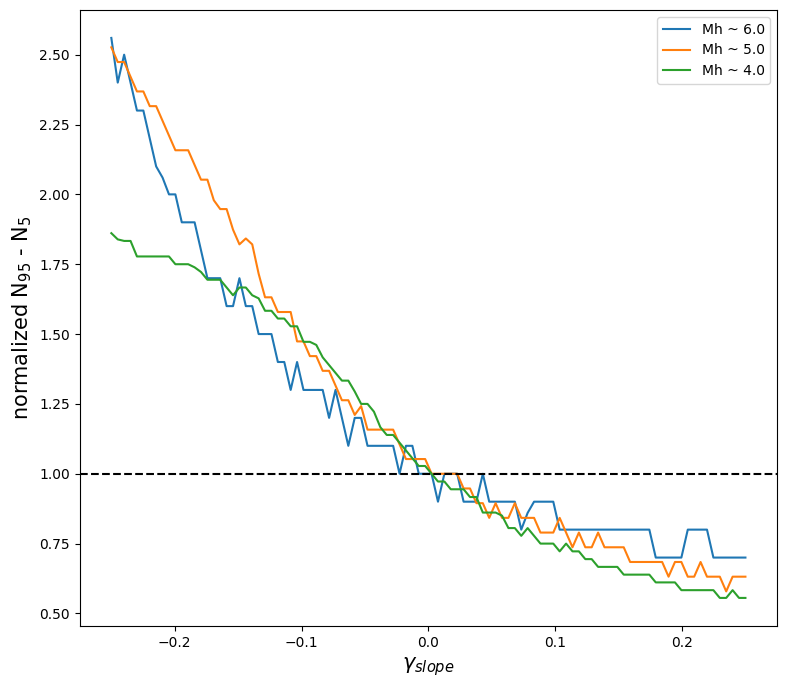

In [17]:
N_diff_4 = mat[:,2,8] - mat[:,0,8]

N_diff_5 = mat[:,2,15] - mat[:,0,15]

N_diff_6 = mat[:,2,22] - mat[:,0,22]

real_diff_4 = surv_CSMF[2, 8] - surv_CSMF[0, 8]

real_diff_5 = surv_CSMF[2, 15] - surv_CSMF[0, 15]

real_diff_6 = surv_CSMF[2, 22] - surv_CSMF[0, 22]
plt.figure(figsize=(9,8))

plt.plot(gammas, N_diff_6/real_diff_6, label="Mh ~ "+str(np.round(np.log10(surv_massr[22]))))
plt.plot(gammas, N_diff_5/real_diff_5, label="Mh ~ "+str(np.round(np.log10(surv_massr[15]))))
plt.plot(gammas, N_diff_4/real_diff_4, label="Mh ~ "+str(np.round(np.log10(surv_massr[8]))))


plt.axhline(1, color="black", ls="--")
plt.xlabel("$\gamma_{slope}$", fontsize=15)
plt.ylabel("normalized $\mathrm{N}_{95}$ - $\mathrm{N}_{5}$", fontsize=15)
plt.legend()
plt.show()
plt.show()

In [18]:
gammas = np.linspace(-0.25,0.25,100) 

mat = np.zeros(shape=(100, 3, 50))

for i,val in enumerate(gammas):
    
    surv_massr_i, surv_CSMF_i = CSMF(SHMR(as_data, alt="i", gamma=val, red=as_red), plot=False) 

    mat[i] = surv_CSMF_i 

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_25184/2100572962.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, label="$\gamma_{intercept}$")


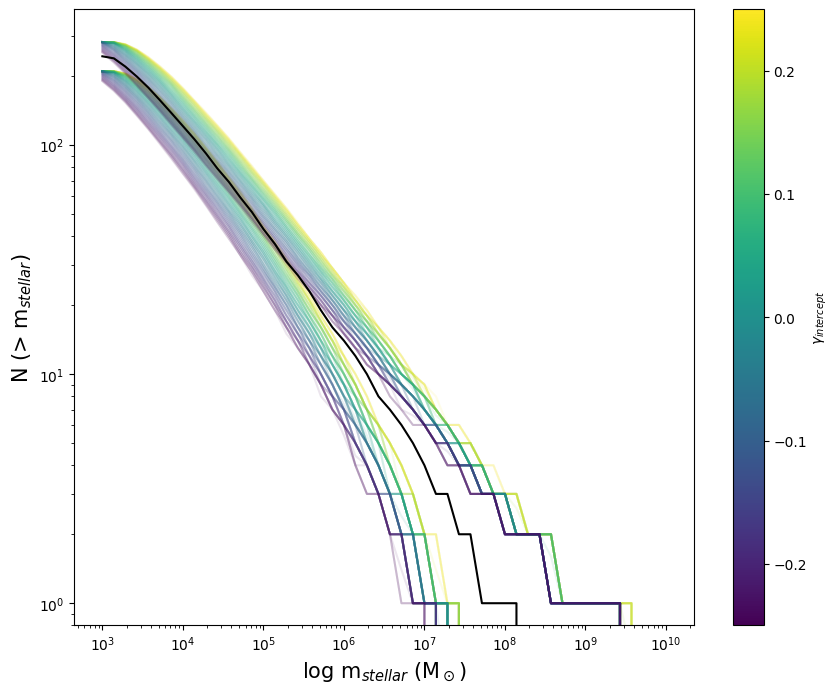

In [20]:
plt.figure(figsize=(10,8))

for i,val in enumerate(mat):
    
    plt.plot(surv_massr, val[0,:], alpha=0.1, color=colors[i])
    plt.plot(surv_massr, val[2,:], alpha=0.1, color=colors[i])

plt.plot(surv_massr, surv_CSMF[1,:], color="black")

plt.yscale("log")
plt.xscale("log")
plt.colorbar(cmap, label="$\gamma_{intercept}$")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.ylim(0.8)
plt.show()

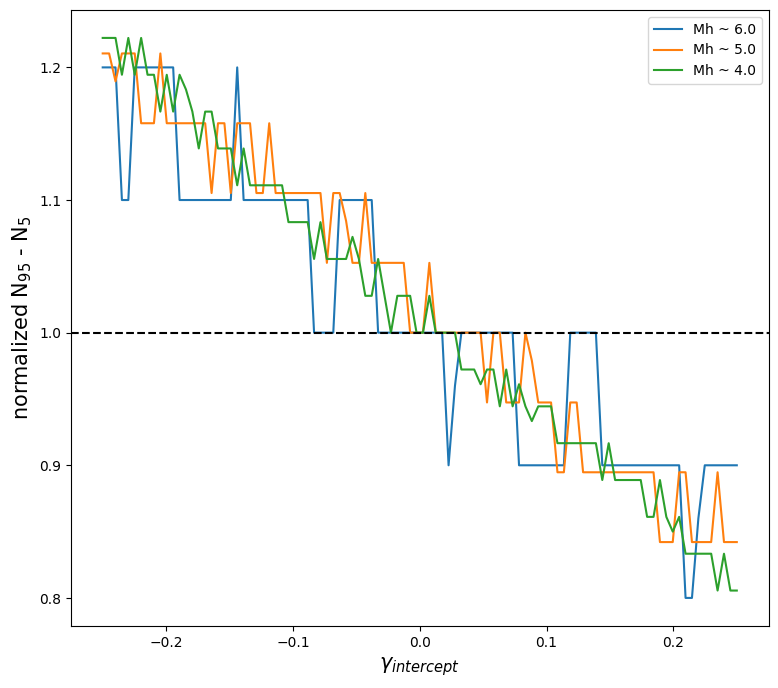

In [21]:
N_diff_4 = mat[:,2,8] - mat[:,0,8]

N_diff_5 = mat[:,2,15] - mat[:,0,15]

N_diff_6 = mat[:,2,22] - mat[:,0,22]

real_diff_4 = surv_CSMF[2, 8] - surv_CSMF[0, 8]

real_diff_5 = surv_CSMF[2, 15] - surv_CSMF[0, 15]

real_diff_6 = surv_CSMF[2, 22] - surv_CSMF[0, 22]
plt.figure(figsize=(9,8))

plt.plot(gammas, N_diff_6/real_diff_6, label="Mh ~ "+str(np.round(np.log10(surv_massr[22]))))
plt.plot(gammas, N_diff_5/real_diff_5, label="Mh ~ "+str(np.round(np.log10(surv_massr[15]))))
plt.plot(gammas, N_diff_4/real_diff_4, label="Mh ~ "+str(np.round(np.log10(surv_massr[8]))))


plt.axhline(1, color="black", ls="--")
plt.xlabel("$\gamma_{intercept}$", fontsize=15)
plt.ylabel("normalized $\mathrm{N}_{95}$ - $\mathrm{N}_{5}$", fontsize=15)
plt.legend()
plt.show()
plt.show()